In [16]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

dataset = pd.read_csv("Medical_insurance.csv")
dataset.head(10)

In [2]:
# find missing values if any

dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

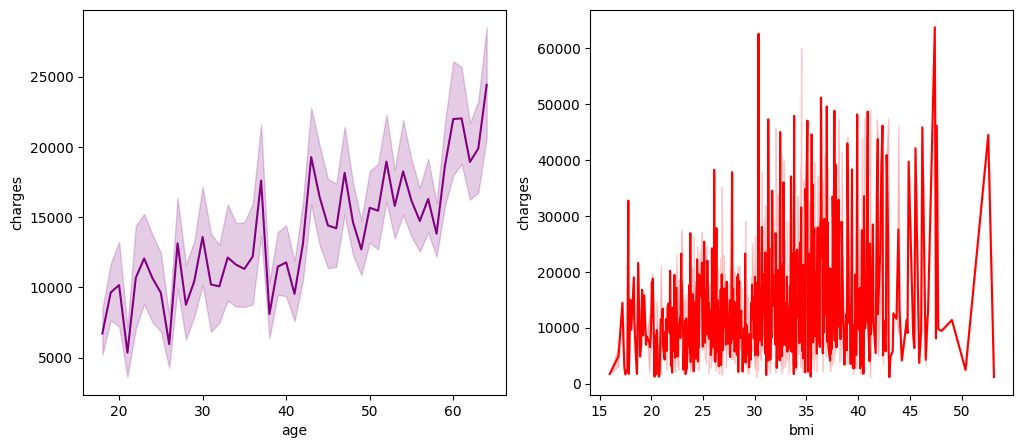

In [3]:
# let's plot age and bmi with charges

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(12, 5))

sns.lineplot(data=dataset, x="age", y="charges", color="purple", ax=axs[0])
sns.lineplot(data=dataset, x="bmi", y="charges", color="red", ax=axs[1])

plt.savefig("age_bmi_charges.png", dpi=300)
plt.show()

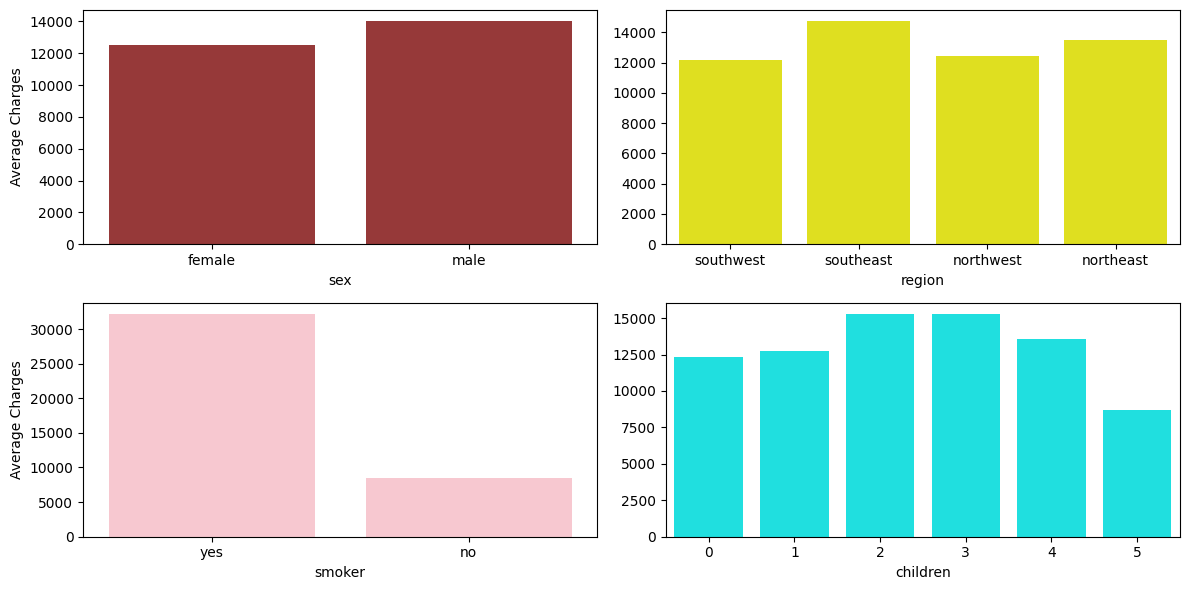

In [4]:
# Let's plot barplots for region, sex and children (it shows the mean value of charges for each category) 

fig, axs = plt.subplots(2,2, figsize=(12, 6))

sns.barplot(data=dataset, x="sex", y="charges", ax = axs[0,0], errorbar=None, color="brown")
sns.barplot(data=dataset, x="region", y="charges", ax = axs[0,1], errorbar=None, color="yellow")
sns.barplot(data=dataset, x="smoker", y="charges", ax = axs[1,0], errorbar=None, color="pink")
sns.barplot(data=dataset, x="children", y="charges", ax = axs[1,1], errorbar=None, color="cyan")


axs[0,0].set_ylabel("Average Charges")
axs[0,1].set_ylabel("")
axs[1,0].set_ylabel("Average Charges")
axs[1,1].set_ylabel("")

plt.tight_layout()
plt.savefig("sex_region_smoker_vs_chargespng", dpi=300)
plt.show()

In [5]:
# lets convert the string data into numerical data. 

# we start with sex

def gender(x):
    if x in ["male"]:
        return 1
    else:
        return 0

dataset["sex"] = dataset["sex"].map(gender)
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
5,31,0,25.740,0,no,southeast,3756.62160
6,46,0,33.440,1,no,southeast,8240.58960
7,37,0,27.740,3,no,northwest,7281.50560
8,37,1,29.830,2,no,northeast,6406.41070
9,60,0,25.840,0,no,northwest,28923.13692


In [6]:
# lets convert smoker too

def smoker(x):
    if x in ["yes"]:
        return 1
    else:
        return 0

dataset["smoker"] = dataset["smoker"].map(smoker)
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [7]:
# lets convert region too

#first find the unique values in region

dataset["region"].unique()

# convert 

# lets convert smoker too

def region(x):
    if x in ["southeast"]:
        return 0
    elif x in ["southwest"]:
        return 1
    elif x in ["northeast"]:
        return 2
    else:
        return 3

dataset["region"] = dataset["region"].map(region)
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,3,7281.50560
8,37,1,29.830,2,0,2,6406.41070
9,60,0,25.840,0,0,3,28923.13692


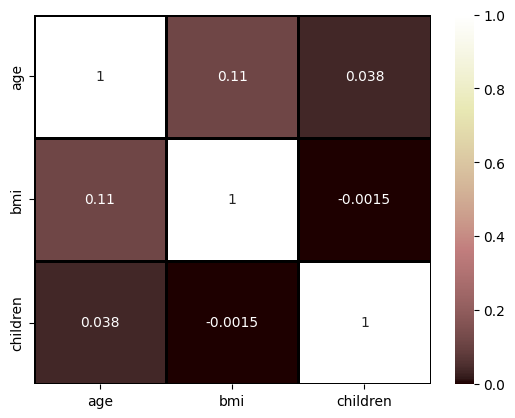

In [8]:
#generating a correlation heatmap

#heatmap shows values as different colors in a matrix, it is important because it allows to find correlated features (one can remove it to reduce redundancy therefore improving fitting)

correlation_matrix = dataset[['age', 'bmi', 'children']].corr()
sns.heatmap(correlation_matrix, cmap="pink", annot=True, linewidth=1,linecolor="black")
plt.savefig("heatmap_correlation.png")
plt.show()

#insights, no features are tightly correlated


In [9]:
# let's create a training and test dataset

from sklearn.model_selection import train_test_split

X = dataset.drop("charges", axis=1)  # Dropping (removing) the column "charges"
y = dataset["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#lets train a model

from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor 
from sklearn.metrics import r2_score

models = [('RandomForest', RandomForestRegressor()), ('XGBRegressor', XGBRegressor())]
r2_score_models = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_score_model = r2_score(y_pred, y_test)
    r2_score_models.append((name,r2_score_model)) # pass name and score as a tuple

print(r2_score_models)

#insights, XGB is a better model

[('RandomForest', 0.9468211890778897), ('XGBRegressor', 0.9537343676837317)]


In [11]:
# lets do cross validation (10 fold)
import numpy as np
from sklearn.model_selection import cross_val_score

best_r2_score = 0 # to initialize

models = [('RandomForest', RandomForestRegressor()), ('XGBRegressor', XGBRegressor())]

for name, model in models:
    cross_val_score_model = cross_val_score(model, X_train, y_train, cv=10)
    mean_cross_val_score = np.mean(cross_val_score_model)
    if mean_cross_val_score > best_r2_score:
        best_r2_score = mean_cross_val_score
        best_model_name = name
print(f'best model : {best_model_name}') # use f to embed variable inside the string 
#print(mean_cross_val_score)
print(f'best r2 score : {best_r2_score}')

#insights: XGBRegressor is better.

best model : XGBRegressor
best r2 score : 0.9395266788526415


In [12]:
# the final model is 
final_model = XGBRegressor()
final_model.fit(X_train, y_train)

# lets load it into joblib

import joblib

joblib.dump(final_model, "final_model_XGB.joblib")
loaded_model = joblib.load("final_model_XGB.joblib")

In [13]:
# lets test the model

#dataset.head()

new_data = [[23, 1, 32.007, 10, 1, 3]] # to pass it as a 2D data structure not 1D, predict needs that

y_pred_new = loaded_model.predict(new_data)
print(f"Insurance Expense: {y_pred_new}")

Insurance Expense: [34391.31]


In [14]:
#hurray